<a href="https://colab.research.google.com/github/leedy40259/Ybigta_summer/blob/main/0719_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일 가져오기
df = pd.read_csv('/content/drive/MyDrive/Ybigta_summer/titanic.csv')

In [ ]:
# 컬럼 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
# 결측치 확인
df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# df 확인
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


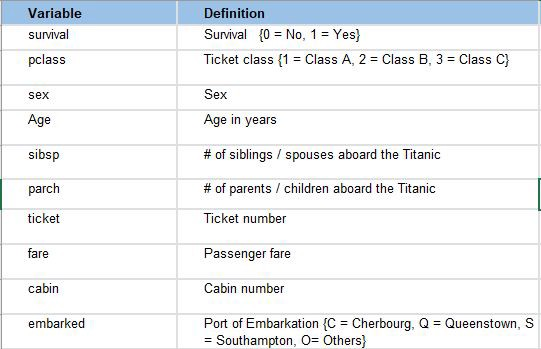

### FE 계획
1. Age - imputation (mean으로)
2. Age - logarithm transformation 
2. Age - Standard Scaling
3. sibsp + parch -> 부양가족있음 indicator Variables
4. Fare - imputation
4. Fare - logarithm transformation
4. Fare - Scaling
5. Embarked - label encoding



### Age - imputation

In [ ]:
# 결측치 mean으로 채우기
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
# imputation 이후 결측치 개수 확인
df['Age'].isnull().sum()

0

### Age - logarithm transformation & standard scaler

In [ ]:
# 로그변환
df['Age_log'] = np.log(df['Age'])
df['Age_log'].head()

0    3.540959
1    3.850148
2    4.127134
3    3.295837
4    3.091042
Name: Age_log, dtype: float64

In [ ]:
# standard scaler 필요한 모듈 import
from sklearn.preprocessing import StandardScaler
sd_scaler = StandardScaler()

In [ ]:
# Standard scaling
sd_scaler = sd_scaler.fit_transform(df['Age_log'].values.reshape(-1, 1))
df['sd_scaled_Age'] = sd_scaler

In [ ]:
# standard scaling 확인
df['sd_scaled_Age'].describe()

count    4.180000e+02
mean     2.464801e-16
std      1.001198e+00
min     -7.265539e+00
25%     -1.928536e-01
50%      2.031176e-01
75%      4.426956e-01
max      1.529741e+00
Name: sd_scaled_Age, dtype: float64

### sibsp + parch -> 부양가족 있음 Indicator Variables

In [ ]:
df['family'] = df['SibSp'].add(df['Parch'], axis = 0)
df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_log,sd_scaled_Age,family
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,3.540959,0.391508,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3.850148,0.837115,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,4.127134,1.236312,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,3.295837,0.038234,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,3.091042,-0.256918,2


### Fare - Imputation

In [ ]:
# 결측치 제거
df['Fare'] = df['Fare'].fillna(0)
df['Fare'].isnull().sum()

0

### Fare - logarithm transformation & standard scaling

In [ ]:
# logarithm transformation
df['Fare_log'] = np.log(df['Fare'])
df['Fare_log']

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      2.057860
1      1.945910
2      2.270836
3      2.159003
4      2.508582
         ...   
413    2.085672
414    4.690430
415    1.981001
416    2.085672
417    3.107198
Name: Fare_log, Length: 417, dtype: float64

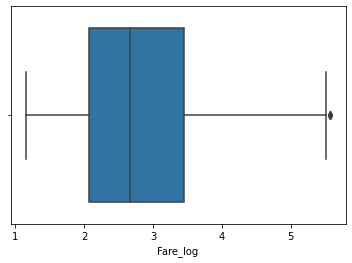

In [ ]:
# Fare_log의 이상치 확인
sns.boxplot(x=df['Fare_log'])

In [ ]:
# Fare_log의 이상치 제거
outlier = df[df['Fare_log'] >= 6].index
df = df.drop(outlier)

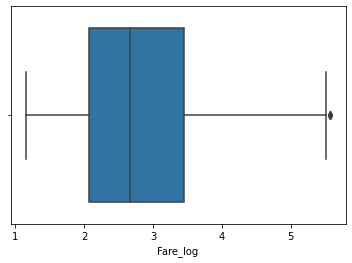

In [ ]:
sns.boxplot(x=df['Fare_log'])

In [ ]:
# nan, infinity 확인
print(np.isnan(df['Fare_log']).sum())
print(np.isinf(df['Fare_log']).sum())

0
2


In [ ]:
# infinity를 0으로 바꾸기 (꼭 -inf도 포함시켜야 함!)
df['Fare_log'].replace([np.inf, -np.inf], 0, inplace = True)
np.isinf(df['Fare_log']).sum()

0

In [ ]:
# standard scaling
sd_scaler = StandardScaler()
sd_scaler2 = sd_scaler.fit_transform(df['Fare_log'].values.reshape(-1, 1))
df['sd_scaled_Fare'] = sd_scaler2
df['sd_scaled_Fare'].describe()

count    4.170000e+02
mean    -1.288604e-16
std      1.001201e+00
min     -2.958794e+00
25%     -8.792366e-01
50%     -2.707122e-01
75%      5.132768e-01
max      2.649027e+00
Name: sd_scaled_Fare, dtype: float64

### Embarked - label encoding

In [ ]:
# 필요한 모듈 임포트
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
# label encoding
encoded = encoder.fit_transform(df['Embarked'])
df['label_Embarked'] = encoded

In [ ]:
# Embarked 컬럼과 label_Embarked 컬럼 비교
print(df.label_Embarked.value_counts())
print(df.Embarked.value_counts())

2    270
0    101
1     46
Name: label_Embarked, dtype: int64
S    270
C    101
Q     46
Name: Embarked, dtype: int64
